In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten


In [6]:

def Load_Dataset_Preprocessing(dataset):

    all_images = []
    all_labels = []



    for i,items in enumerate(glob.glob(dataset)):

        img = cv2.imread(items)
        img = cv2.resize(img, (32,32))
        img = img/255.0

        all_images.append(img)

        label = items.split("/")[-2]
        all_labels.append(label)

        if i%100 == 0:print ("[INFO] {}/4000 processed".format(i))

    all_images = np.array(all_images)

    lb = LabelBinarizer()
    all_labels = lb.fit_transform(all_labels)

    trainx,testx,trainy,testy = train_test_split(all_images, all_labels, test_size=0.2, random_state=12)

    return trainx,testx,trainy,testy



In [10]:
def CNN_Model():

    model = Sequential([
        
        Conv2D(32,(3,3),activation='relu',padding='same', input_shape = (32,32,3)),
        MaxPool2D(),
        Conv2D(32,(3,3),activation='relu'),
        MaxPool2D(),

        Flatten(),

        Dense(32, activation='relu'),
        Dense(10, activation='softmax')
                      ])

    model.compile(optimizer='SGD',
                 loss = "categorical_crossentropy",
                 metrics = ['accuracy'])

    return model



In [15]:
def Visualizing(H):

    plt.plot(H.history['accuracy'], label = 'Train Accuracy')
    plt.plot(H.history['val_accuracy'], label = 'Test Accuracy')
    plt.plot(H.history['loss'], label = 'Train Loss')
    plt.plot(H.history['val_loss'], label = 'Test Loss')

    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()

In [7]:
trainx,testx,trainy,testy = Load_Dataset_Preprocessing("/Users/admin/Documents/MyDocuments/Ai/DeepLearning/DeepLearning Courses/Ostad Ghasemi/Codes/Week-4/Dataset/Digit/*/*")

[INFO] 0/4000 processed
[INFO] 100/4000 processed
[INFO] 200/4000 processed
[INFO] 300/4000 processed
[INFO] 400/4000 processed
[INFO] 500/4000 processed
[INFO] 600/4000 processed
[INFO] 700/4000 processed
[INFO] 800/4000 processed
[INFO] 900/4000 processed
[INFO] 1000/4000 processed
[INFO] 1100/4000 processed
[INFO] 1200/4000 processed
[INFO] 1300/4000 processed
[INFO] 1400/4000 processed
[INFO] 1500/4000 processed
[INFO] 1600/4000 processed
[INFO] 1700/4000 processed
[INFO] 1800/4000 processed
[INFO] 1900/4000 processed
[INFO] 2000/4000 processed
[INFO] 2100/4000 processed
[INFO] 2200/4000 processed
[INFO] 2300/4000 processed
[INFO] 2400/4000 processed
[INFO] 2500/4000 processed
[INFO] 2600/4000 processed
[INFO] 2700/4000 processed
[INFO] 2800/4000 processed
[INFO] 2900/4000 processed
[INFO] 3000/4000 processed
[INFO] 3100/4000 processed
[INFO] 3200/4000 processed
[INFO] 3300/4000 processed
[INFO] 3400/4000 processed
[INFO] 3500/4000 processed
[INFO] 3600/4000 processed
[INFO] 3700/4

In [14]:
model = CNN_Model()
H = model.fit(trainx, trainy, epochs = 20, batch_size=32, validation_data=(testx,testy))
model.save("Digi_Recognition.h5")

Epoch 1/20
101/101 [==============================] - 3s 29ms/step - loss: 2.0689 - accuracy: 0.3961 - val_loss: 1.7334 - val_accuracy: 0.6978
Epoch 2/20
101/101 [==============================] - 3s 30ms/step - loss: 1.1337 - accuracy: 0.7621 - val_loss: 0.6303 - val_accuracy: 0.8632
Epoch 3/20
101/101 [==============================] - 3s 31ms/step - loss: 0.4180 - accuracy: 0.9095 - val_loss: 0.3685 - val_accuracy: 0.8980
Epoch 4/20
101/101 [==============================] - 3s 34ms/step - loss: 0.2371 - accuracy: 0.9440 - val_loss: 0.2153 - val_accuracy: 0.9502
Epoch 5/20
101/101 [==============================] - 3s 29ms/step - loss: 0.1648 - accuracy: 0.9602 - val_loss: 0.1895 - val_accuracy: 0.9540
Epoch 6/20
101/101 [==============================] - 3s 26ms/step - loss: 0.1345 - accuracy: 0.9658 - val_loss: 0.1621 - val_accuracy: 0.9639
Epoch 7/20
101/101 [==============================] - 3s 27ms/step - loss: 0.1020 - accuracy: 0.9742 - val_loss: 0.1545 - val_accuracy: 0.9677

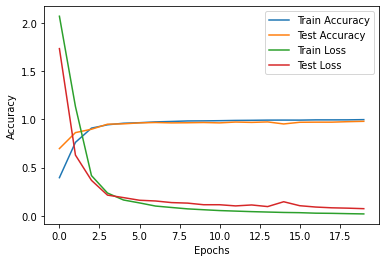

In [16]:
Visualizing(H)